José Luis Roberto Zárate Cortés (000183347)
### **Semana 3; Clase 3_algebra_lineal, 3_minimos_cuadrados**
### _No Lineales y Error Cuadrático Medio._
1.- Ajusta por mínimos cuadrados dos modelos de la forma:
* $\log(y) = \log(b) + a\log(x)$, utilizaremos la sustitución $\beta_0=log(b)$ y $\beta_1=a$
* $\log(y) = \log(b) + a\log(x) + c\log(x)^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
from numpy import log, exp
from scipy.interpolate import interp1d

np.set_printoptions(precision = 7)

_DATOS_

In [2]:
datos = np.loadtxt('datos_para_tarea_minimos_cuadrados.txt', skiprows=1)
x = datos[:,0]
y = datos[:,1]
mpoints, = x.shape

**MODELO 1**

In [3]:
phi_1 = lambda vx: log(vx)
phi_2 = lambda vx: exp(vx)
A=np.ones((mpoints,2))
A[:,1] = phi_1(x)
lny=phi_1(y)
Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R,Q.T@lny)
A[:,1] = phi_2(A[:,1])
#mlogbeta=np.array([beta[0],beta[1]])
y_ajustadas_QR = A@beta
print('Coeficientes de beta:',beta)

Coeficientes de beta: [0.2646476 0.5756426]


**MODELO 2**

In [4]:
coefpoln2=np.polyfit(x,y,2)
coefpoln2
ymodpol=np.polyval(coefpoln2,x)
print('Coeficientes:',coefpoln2)

Coeficientes: [-0.0515962  1.0184531  0.1677274]


**GRÁFICAS DE LOS MODELOS**

Text(0.5, 1.0, 'datos')

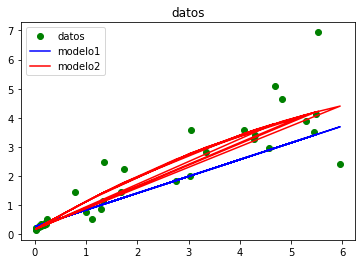

In [5]:
plt.plot(x, y, 'go', x, y_ajustadas_QR , 'b-', x, ymodpol, 'r-')
plt.legend(['datos', 'modelo1', 'modelo2'], loc='best')
plt.title('datos')

**ECM**

In [6]:
ECM_M1=1/(y.shape[0]-1)*sum((y-y_ajustadas_QR)**2)
ECM_M2=1/(y.shape[0]-1)*sum((y-ymodpol)**2)
print('El error cuadrático medio para el modelo1 ES:',ECM_M1)
print('El error cuadrático medio para el modelo2 cuadrático es:',ECM_M2)

El error cuadrático medio para el modelo1 ES: 0.8431400069977577
El error cuadrático medio para el modelo2 cuadrático es: 0.5390208794163341
